In [1]:
import kagglehub
import os
import glob
import pandas as pd
from kagglehub import KaggleDatasetAdapter

# Download latest version
path = kagglehub.dataset_download("jessemostipak/hotel-booking-demand")

# Find the CSV file within the downloaded directory
csv_files = glob.glob(os.path.join(path, '*.csv'))

if not csv_files:
    raise FileNotFoundError("No CSV file found in the downloaded dataset.")

# Assuming there's only one CSV file, use the first one found
csv_file_path = csv_files[0]

# Load the latest version using pandas read_csv
df = pd.read_csv(csv_file_path)

print(df.info())

Using Colab cache for faster access to the 'hotel-booking-demand' dataset.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  bab

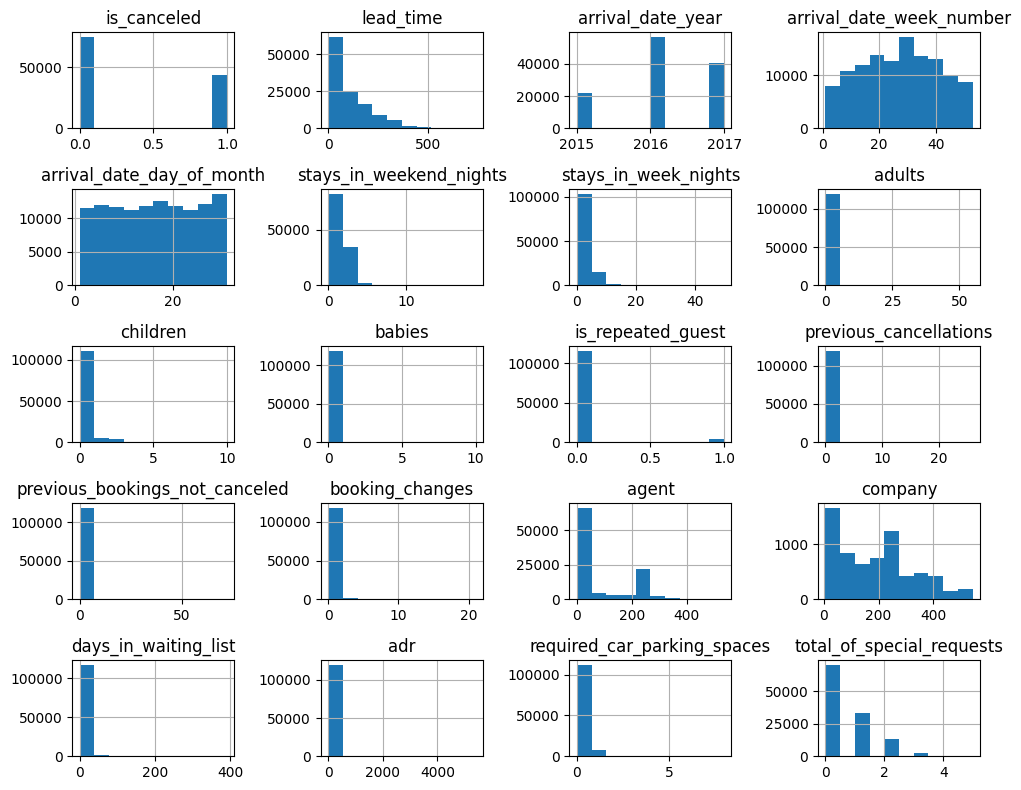

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for numerical columns
df[numerical_cols].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

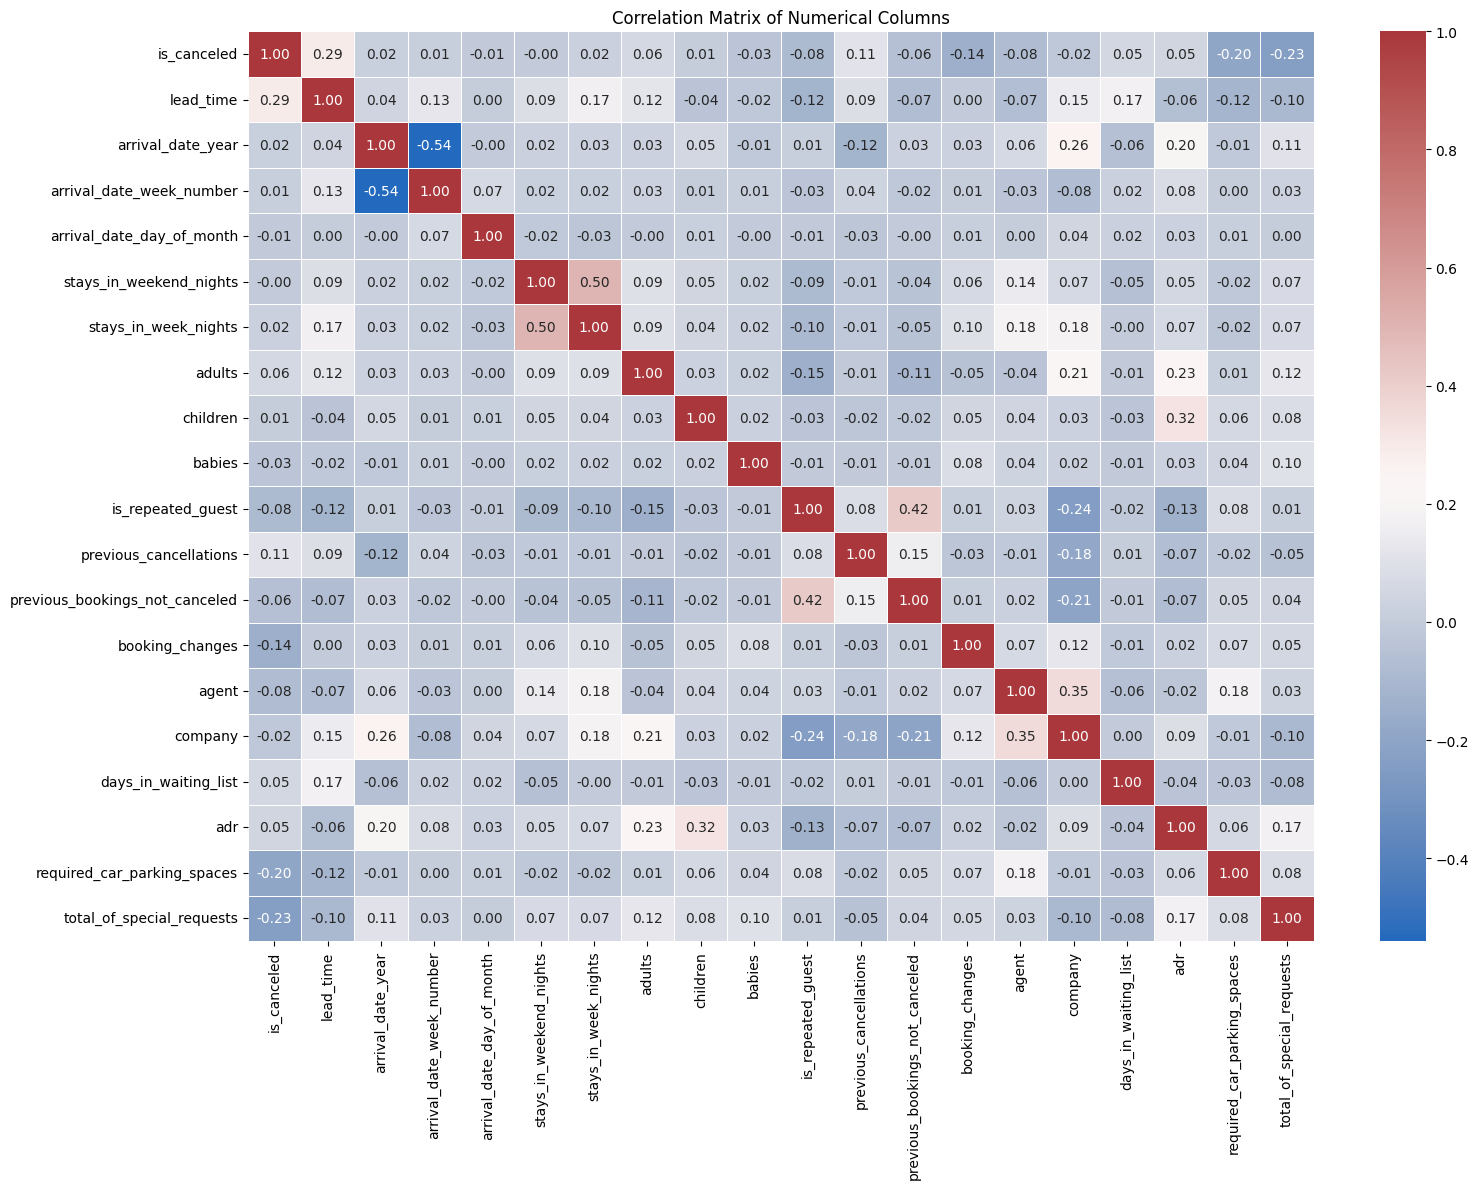

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(16, 12)) # Adjust figure size as needed

# Draw the heatmap with correlation coefficients and a navy-white color palette
sns.heatmap(correlation_matrix, annot=True, cmap='vlag', fmt=".2f", linewidths=.5) # Using 'vlag' which is a diverging colormap suitable for correlation

# Set title
plt.title('Correlation Matrix of Numerical Columns')

# Improve readability of tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

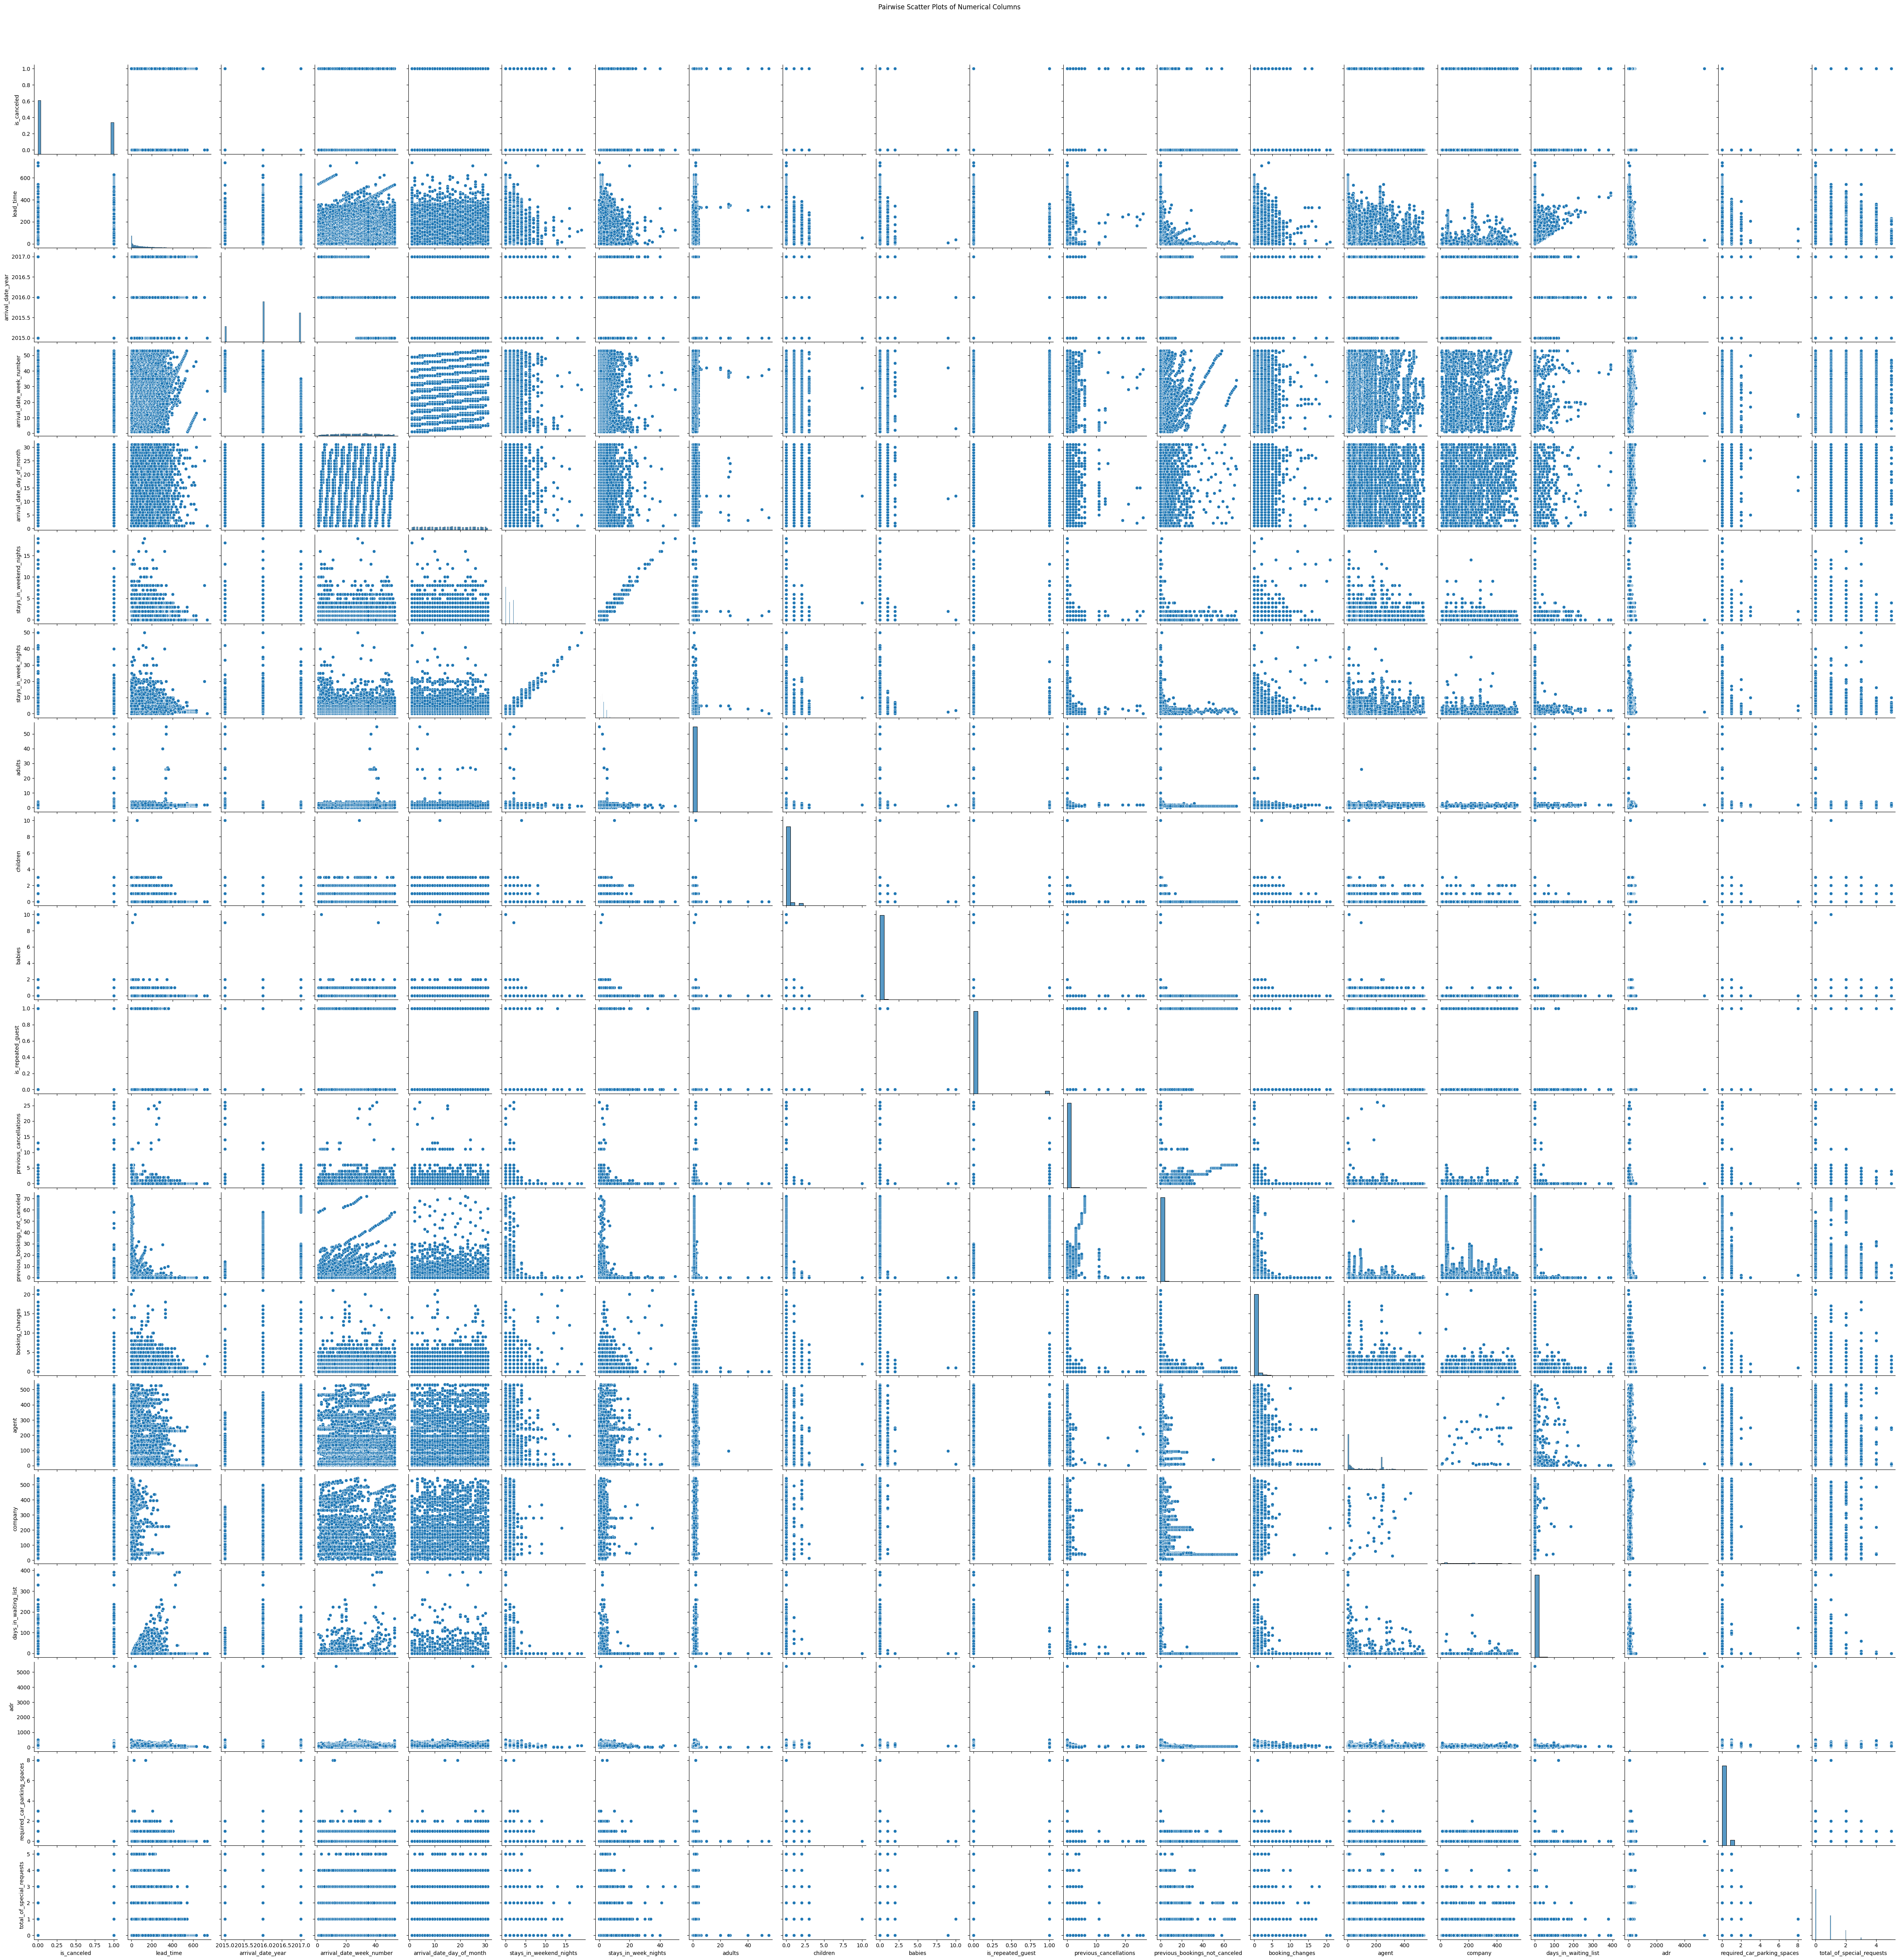

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create a scatter plot matrix for numerical columns
sns.pairplot(df[numerical_cols])

# Add a title
plt.suptitle('Pairwise Scatter Plots of Numerical Columns', y=1.02)

# Show the plot
plt.show()

In [5]:
summary_list = []

for col in df.columns:
    col_summary = {'Column': col}
    col_summary['Parameter Type'] = df[col].dtype

    # Number of unique values for all columns
    col_summary['Number of Unique Values'] = df[col].nunique()

    # Share of empty values
    col_summary['% of Null'] = df[col].isnull().sum() / len(df)

    if df[col].dtype in ['int64', 'float64']:
        # Statistics for numerical columns
        col_summary['Min'] = df[col].min()
        col_summary['Max'] = df[col].max()
        col_summary['Average'] = df[col].mean()
        col_summary['Top 5 Categories'] = None # Not applicable for numerical

        # Calculate number of observations more than 2 standard deviations from the mean
        mean = df[col].mean()
        std_dev = df[col].std()
        outliers = df[(df[col] > mean + 2 * std_dev) | (df[col] < mean - 2 * std_dev)]
        col_summary['% of > 2 St.Dev.'] = len(outliers) / len(df) * 100

    else:
        # Statistics for categorical columns
        col_summary['Min'] = None # Not applicable for categorical
        col_summary['Max'] = None # Not applicable for categorical
        col_summary['Average'] = None # Not applicable for categorical
        top_categories = df[col].value_counts().nlargest(5).index.tolist()
        col_summary['Top 5 Categories'] = top_categories
        col_summary['% of > 2 St.Dev.'] = None # Not applicable for categorical

    summary_list.append(col_summary)

summary_df = pd.DataFrame(summary_list)
display(summary_df)

Column Parameter Type  Number of Unique Values  \
0                            hotel         object                        2   
1                      is_canceled          int64                        2   
2                        lead_time          int64                      479   
3                arrival_date_year          int64                        3   
4               arrival_date_month         object                       12   
5         arrival_date_week_number          int64                       53   
6        arrival_date_day_of_month          int64                       31   
7          stays_in_weekend_nights          int64                       17   
8             stays_in_week_nights          int64                       35   
9                           adults          int64                       14   
10                        children        float64                        5   
11                          babies          int64                        5   
12                            meal         object                        5   
13                         country         object                      177   
14                  market_segment         object                        8   
15            distribution_channel         object                        5   
16               is_repeated_guest          int64                        2   
17          previous_cancellations          int64                       15   
18  previous_bookings_not_canceled          int64                       73   
19              reserved_room_type         object                       10   
20              assigned_room_type         object                       12   
21                 booking_changes          int64                       21   
22                    deposit_type         object                        3   
23                           agent        float64                      333   
24                         company        float64                      352   
25            days_in_waiting_list          int64                      128   
26                   customer_type         object                        4   
27                             adr        float64                     8879   
28     required_car_parking_spaces          int64                        5   
29       total_of_special_requests          int64                        6   
30              reservation_status         object                        3   
31         reservation_status_date         object                      926   

    % of Null      Min     Max      Average  \
0    0.000000      NaN     NaN          NaN   
1    0.000000     0.00     1.0     0.370416   
2    0.000000     0.00   737.0   104.011416   
3    0.000000  2015.00  2017.0  2016.156554   
4    0.000000      NaN     NaN          NaN   
5    0.000000     1.00    53.0    27.165173   
6    0.000000     1.00    31.0    15.798241   
7    0.000000     0.00    19.0     0.927599   
8    0.000000     0.00    50.0     2.500302   
9    0.000000     0.00    55.0     1.856403   
10   0.000034     0.00    10.0     0.103890   
11   0.000000     0.00    10.0     0.007949   
12   0.000000      NaN     NaN          NaN   
13   0.004087      NaN     NaN          NaN   
14   0.000000      NaN     NaN          NaN   
15   0.000000      NaN     NaN          NaN   
16   0.000000     0.00     1.0     0.031912   
17   0.000000     0.00    26.0     0.087118   
18   0.000000     0.00    72.0     0.137097   
19   0.000000      NaN     NaN          NaN   
20   0.000000      NaN     NaN          NaN   
21   0.000000     0.00    21.0     0.221124   
22   0.000000      NaN     NaN          NaN   
23   0.136862     1.00   535.0    86.693382   
24   0.943069     6.00   543.0   189.266735   
25   0.000000     0.00   391.0     2.321149   
26   0.000000      NaN     NaN          NaN   
27   0.000000    -6.38  5400.0   101.831122   
28   0.000000     0.00     8.0     0.062518   
29   0.000000     0.00     5.0     0.571363

In [6]:
# Combine year, month, and day columns into a single 'arrival_date' column
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' +
                                     df['arrival_date_month'].astype(str) + '-' +
                                     df['arrival_date_day_of_month'].astype(str),
                                     errors='coerce') # Use errors='coerce' to handle potential invalid dates

# Add column length_of_stay = stays_in_weekend_nights + stays_in_week_nights
df['length_of_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Add column departure_date = arrival_date + length_of_stay
df['departure_date'] = df['arrival_date'] + pd.to_timedelta(df['length_of_stay'], unit='days')

# Update 'adults' column: if 0 then adults = 1 otherwise keep the current value
df['adults'] = df['adults'].replace(0, 1)

# Add column number_of_guests = adults + children + babies, if the sum is greater than 5 then cap it at 5
df['number_of_guests'] = df['adults'] + df['children'].fillna(0) + df['babies'] # Fill NaN in children with 0 for calculation
df['number_of_guests'] = df['number_of_guests'].apply(lambda x: 5 if x > 5 else x)

# Add column if_children = if children + babies > 0 then 1 else 0
df['if_children'] = ((df['children'].fillna(0) + df['babies']) > 0).astype(int)

# Update 'meal' column to be the number of meals per day
meal_mapping = {'BB': 1, 'HB': 2, 'FB': 3}
df['meal'] = df['meal'].map(meal_mapping).fillna(0).astype(int) # Map values and fill any unmapped values with 0

# Add column is_domestic: if the the visit is from Portugal (PRT) then set to 1, otherwise set to 0
df['is_domestic'] = (df['country'] == 'PRT').astype(int)

# Add column 'segment_generic' based on market_segment
def map_segment_generic(segment):
    if segment == 'Direct':
        return 'Direct'
    elif segment == 'Groups':
        return 'Groups'
    elif segment == 'Offline TA/TO':
        return 'Offline_TA'
    elif segment == 'Online TA':
        return 'OTA'
    else:
        return 'Bundles'

df['segment_generic'] = df['market_segment'].apply(map_segment_generic)

# Perform one-hot encoding on the 'segment_generic' column
one_hot_encoded_segment = pd.get_dummies(df['segment_generic'], prefix='segment_generic')

# Convert boolean columns to integer (0 or 1)
one_hot_encoded_segment = one_hot_encoded_segment.astype(int)

# Drop existing one-hot encoded columns for segment_generic if they exist to avoid duplicates
existing_one_hot_cols_segment = [col for col in df.columns if col.startswith('segment_generic_')]
df = df.drop(columns=existing_one_hot_cols_segment, errors='ignore')

# Concatenate the new one-hot encoded columns for segment_generic with the original DataFrame
df = pd.concat([df, one_hot_encoded_segment], axis=1)

# Perform one-hot encoding on the 'reserved_room_type' column
one_hot_encoded_room = pd.get_dummies(df['reserved_room_type'], prefix='reserved_room_type')

# Convert boolean columns to integer (0 or 1)
one_hot_encoded_room = one_hot_encoded_room.astype(int)

# Drop existing one-hot encoded columns for reserved_room_type if they exist to avoid duplicates
existing_one_hot_cols_room = [col for col in df.columns if col.startswith('reserved_room_type_')]
df = df.drop(columns=existing_one_hot_cols_room, errors='ignore')

# Concatenate the new one-hot encoded columns for reserved_room_type with the original DataFrame
df = pd.concat([df, one_hot_encoded_room], axis=1)

# Perform one-hot encoding on the 'deposit_type' column
one_hot_encoded_deposit = pd.get_dummies(df['deposit_type'], prefix='deposit_type')

# Convert boolean columns to integer (0 or 1)
one_hot_encoded_deposit = one_hot_encoded_deposit.astype(int)

# Drop existing one-hot encoded columns for deposit_type if they exist to avoid duplicates
existing_one_hot_cols_deposit = [col for col in df.columns if col.startswith('deposit_type_')]
df = df.drop(columns=existing_one_hot_cols_deposit, errors='ignore')

# Concatenate the new one-hot encoded columns for deposit_type with the original DataFrame
df = pd.concat([df, one_hot_encoded_deposit], axis=1)

# Perform one-hot encoding on the 'customer_type' column
one_hot_encoded_customer = pd.get_dummies(df['customer_type'], prefix='customer_type')

# Convert boolean columns to integer (0 or 1)
one_hot_encoded_customer = one_hot_encoded_customer.astype(int)

# Drop existing one-hot encoded columns for customer_type if they exist to avoid duplicates
existing_one_hot_cols_customer = [col for col in df.columns if col.startswith('customer_type_')]
df = df.drop(columns=existing_one_hot_cols_customer, errors='ignore')

# Concatenate the new one-hot encoded columns for customer_type with the original DataFrame
df = pd.concat([df, one_hot_encoded_customer], axis=1)


# Display the first few rows with the new columns
display(df.head())

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                        0                     0       2  ...   
1                        0                     0       2  ...   
2                        0                     1       1  ...   
3                        0                     1       1  ...   
4                        0                     2       2  ...   

   reserved_room_type_H  reserved_room_type_L  reserved_room_type_P  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

  deposit_type_No Deposit deposit_type_Non Refund deposit_type_Refundable  \
0                       1                       0                       0   
1                       1                       0                       0   
2                       1                       0                       0   
3                       1                       0                       0   
4                       1                       0                       0   

   customer_type_Contract  customer_type_Group  customer_type_Transient  \
0                       0                    0                        1   
1                       0                    0                        1   
2                       0                    0                        1   
3                       0                    0                        1   
4                       0                    0                        1   

  customer_type_Transient-Party  
0                             0  
1                             0  
2                             0  
3                             0  
4                             0  

[5 rows x 61 columns]

In [7]:
# Filter out rows where adr is less than or equal to 0
adr_filtered_df = df[df['adr'] > 0].copy()

# Calculate the mean and standard deviation of adr, grouped by hotel
adr_stats = adr_filtered_df.groupby('hotel')['adr'].agg(['mean', 'std']).reset_index()
adr_stats.rename(columns={'mean': 'adr_mean', 'std': 'adr_std'}, inplace=True)

# Merge the adr statistics back to the original DataFrame
df = pd.merge(df, adr_stats, on='hotel', how='left')

# Calculate the normalized adr (adr_norm)
# Handle cases where adr_std is 0 to avoid division by zero
df['adr_norm'] = df.apply(lambda row: (row['adr'] - row['adr_mean']) / row['adr_std'] if row['adr_std'] != 0 else 0, axis=1)

# Set adr_norm to 1.0 if original adr is <= 0
df.loc[df['adr'] <= 0, 'adr_norm'] = 1.0


# Drop the temporary mean and std columns
df = df.drop(columns=['adr_mean', 'adr_std'])

# Display the first few rows with the new column
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 62 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [8]:
min_date = df['arrival_date'].min()
max_date = df['arrival_date'].max()
all_dates = pd.date_range(start=min_date, end=max_date, freq='D')
print(f"Minimum arrival date: {min_date}")
print(f"Maximum arrival date: {max_date}")
print(f"Generated date range length: {len(all_dates)}")

Minimum arrival date: 2015-07-01 00:00:00
Maximum arrival date: 2017-08-31 00:00:00
Generated date range length: 793


In [9]:
unique_hotels = df['hotel'].unique().tolist()
print("Unique Hotels:", unique_hotels)
print("Number of unique hotels:", len(unique_hotels))

Unique Hotels: ['Resort Hotel', 'City Hotel']
Number of unique hotels: 2


In [10]:
import itertools

combinations = list(itertools.product(unique_hotels, all_dates))
occupancy_df = pd.DataFrame(combinations, columns=['hotel', 'effective_date'])
display(occupancy_df.head())

hotel effective_date
0  Resort Hotel     2015-07-01
1  Resort Hotel     2015-07-02
2  Resort Hotel     2015-07-03
3  Resort Hotel     2015-07-04
4  Resort Hotel     2015-07-05

In [11]:
occupied_rooms_count = []

for index, row in occupancy_df.iterrows():
    current_hotel = row['hotel']
    current_date = row['effective_date']

    # Filter original df for bookings matching the current hotel and date range
    occupied_bookings = df[
        (df['hotel'] == current_hotel) &
        (df['arrival_date'] <= current_date) &
        (df['departure_date'] >= current_date)
    ]

    # Count the number of occupied rooms for this hotel and date
    num_occupied = len(occupied_bookings)

    # Store the count
    occupied_rooms_count.append(num_occupied)

# Add the list of occupied room counts as a new column
occupancy_df['number_occupied_rooms'] = occupied_rooms_count

# Display the first few rows with the new column
display(occupancy_df.head())

hotel effective_date  number_occupied_rooms
0  Resort Hotel     2015-07-01                     43
1  Resort Hotel     2015-07-02                     85
2  Resort Hotel     2015-07-03                    118
3  Resort Hotel     2015-07-04                    158
4  Resort Hotel     2015-07-05                    192

In [12]:
# Calculate the maximum number of occupied rooms for each hotel to estimate capacity
hotel_capacity_estimate = occupancy_df.groupby('hotel')['number_occupied_rooms'].max().reset_index(name='estimated_capacity')

# Drop the 'estimated_capacity' column from occupancy_df if it exists before merging
if 'estimated_capacity' in occupancy_df.columns:
    occupancy_df = occupancy_df.drop(columns=['estimated_capacity'])

# Merge the estimated capacity back to the occupancy_df
occupancy_df = pd.merge(occupancy_df, hotel_capacity_estimate, on='hotel', how='left')

# # Drop the duplicate estimated_capacity columns created by the merge (suffixes are added if the column already exists)
# occupancy_df = occupancy_df.drop(columns=['estimated_capacity_x', 'estimated_capacity_y'], errors='ignore')


# Calculate the occupancy percentage using the estimated capacity
occupancy_df['occupancy_percentage'] = (occupancy_df['number_occupied_rooms'] / occupancy_df['estimated_capacity']) * 100

# Display the first few rows of the updated occupancy_df
display(occupancy_df.head())

hotel effective_date  number_occupied_rooms  estimated_capacity  \
0  Resort Hotel     2015-07-01                     43                 425   
1  Resort Hotel     2015-07-02                     85                 425   
2  Resort Hotel     2015-07-03                    118                 425   
3  Resort Hotel     2015-07-04                    158                 425   
4  Resort Hotel     2015-07-05                    192                 425   

   occupancy_percentage  
0             10.117647  
1             20.000000  
2             27.764706  
3             37.176471  
4             45.176471

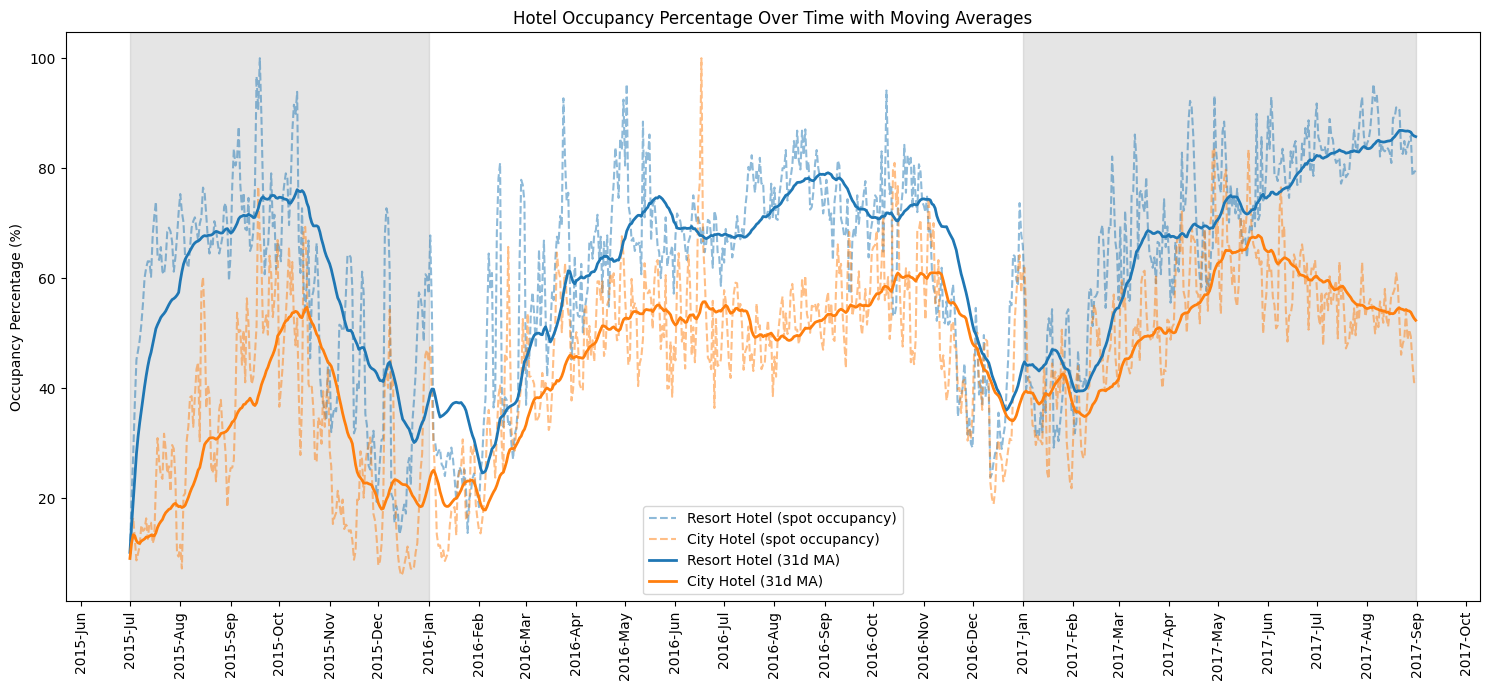

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Calculate 31-day moving average for each hotel
occupancy_df['occupancy_percentage_MA31'] = occupancy_df.groupby('hotel')['occupancy_percentage'].transform(lambda x: x.rolling(window=31, min_periods=1).mean())

# Plot occupancy percentage as a time series for each hotel with lighter dashed lines
plt.figure(figsize=(15, 7)) # Increase figure size for better readability
ax = sns.lineplot(data=occupancy_df, x='effective_date', y='occupancy_percentage', hue='hotel', linestyle='--', alpha=0.5)

# Plot 31-day moving average as solid bold lines
sns.lineplot(data=occupancy_df, x='effective_date', y='occupancy_percentage_MA31', hue='hotel', linestyle='-', linewidth=2)


# Add titles and labels
plt.title('Hotel Occupancy Percentage Over Time with Moving Averages')
plt.xlabel('') # Remove x-axis title
plt.ylabel('Occupancy Percentage (%)')


# Manually create legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
new_handles = []
new_labels = []

# Assuming the order of handles and labels corresponds to the order of lineplot calls (spot, then MA)
# We need to pair the spot occupancy handles with their corresponding hotel labels
# And the MA handles with their corresponding hotel labels

# Get unique hotels
unique_hotels = occupancy_df['hotel'].unique()

# Create handles and labels for spot occupancy (dashed lines)
for i, hotel in enumerate(unique_hotels):
    new_handles.append(handles[i]) # Get the handle for the spot occupancy line for this hotel
    new_labels.append(f'{hotel} (spot occupancy)')

# Create handles and labels for moving averages (solid lines)
for i, hotel in enumerate(unique_hotels):
    new_handles.append(handles[len(unique_hotels) + i]) # Get the handle for the MA line for this hotel
    new_labels.append(f'{hotel} (31d MA)')


plt.legend(new_handles, new_labels)

# Add shaded areas for periods before 2016/01/01 and after 2016/12/31
ax.axvspan(occupancy_df['effective_date'].min(), pd.to_datetime('2016-01-01'), color='grey', alpha=0.2)
ax.axvspan(pd.to_datetime('2017-01-01'), occupancy_df['effective_date'].max(), color='grey', alpha=0.2)

# Format x-axis to show a single label per tick as YYYY-MMM
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
plt.xticks(rotation=90)


# Improve layout and display the plot
plt.tight_layout()
plt.show()

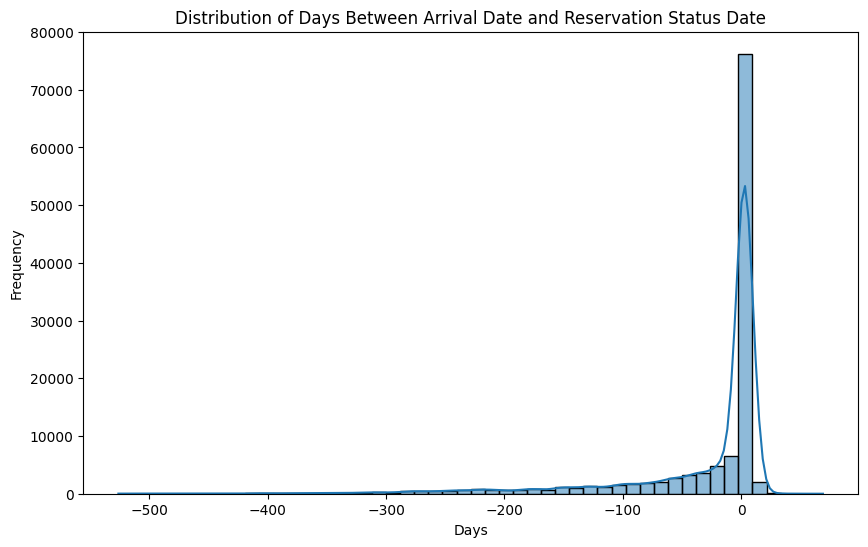

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'reservation_status_date' to datetime objects if not already
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], errors='coerce')

# Calculate the difference in days between arrival_date and reservation_status_date
df['days_to_reservation_status'] = (df['reservation_status_date'] - df['arrival_date']).dt.days

# Plot the distribution of the difference
plt.figure(figsize=(10, 6))
sns.histplot(df['days_to_reservation_status'].dropna(), bins=50, kde=True)
plt.title('Distribution of Days Between Arrival Date and Reservation Status Date')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

booking_date reservation_status_date  days_between_booking_and_status
0   2014-07-24              2015-07-01                              342
1   2013-06-24              2015-07-01                              737
2   2015-06-24              2015-07-02                                8
3   2015-06-18              2015-07-02                               14
4   2015-06-17              2015-07-03                               16

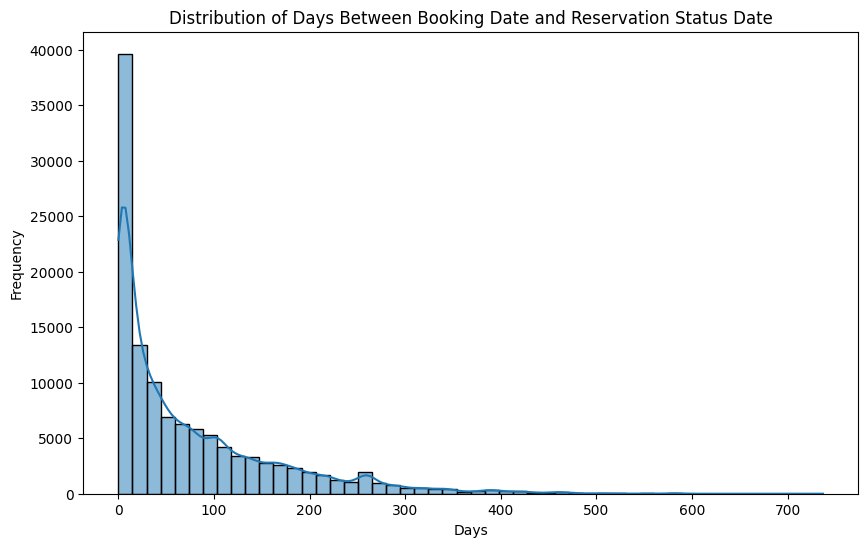

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the booking date
df['booking_date'] = df['arrival_date'] - pd.to_timedelta(df['lead_time'], unit='days')

# Calculate the difference in days between booking_date and reservation_status_date
df['days_between_booking_and_status'] = (df['reservation_status_date'] - df['booking_date']).dt.days

# Display the first few rows with the new column
display(df[['booking_date', 'reservation_status_date', 'days_between_booking_and_status']].head())

# Plot a histogram of the difference
plt.figure(figsize=(10, 6))
sns.histplot(df['days_between_booking_and_status'].dropna(), bins=50, kde=True)
plt.title('Distribution of Days Between Booking Date and Reservation Status Date')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

In [16]:
import pandas as pd

# Merge df with occupancy_df to create df_final
df_final = pd.merge(df, occupancy_df[['hotel', 'effective_date', 'occupancy_percentage']],
                    left_on=['hotel', 'arrival_date'],
                    right_on=['hotel', 'effective_date'],
                    how='left')

# Drop the redundant 'effective_date' column from the merged DataFrame
df_final = df_final.drop('effective_date', axis=1)

# Fill missing values in 'occupancy_percentage' with the mean
df_final['occupancy_percentage'] = df_final['occupancy_percentage'].fillna(df_final['occupancy_percentage'].mean())


# Define the list of columns to drop
columns_to_drop = [
    'hotel', 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month',
    'stays_in_week_nights', 'adults', 'children', 'babies', 'country',
    'market_segment', 'distribution_channel', 'reserved_room_type',
    'assigned_room_type', 'deposit_type', 'agent', 'company', 'customer_type',
    'adr', 'reservation_status', 'reservation_status_date', 'arrival_date', 'departure_date',
    'booking_date', 'days_to_reservation_status', 'days_between_booking_and_status', 'segment_generic'
]

# Drop the specified columns from df_final
df_final = df_final.drop(columns=columns_to_drop, errors='ignore')


# Display the first few rows and info of the final DataFrame
display(df_final.head())
df_final.info()

is_canceled  lead_time  arrival_date_week_number  stays_in_weekend_nights  \
0            0        342                        27                        0   
1            0        737                        27                        0   
2            0          7                        27                        0   
3            0         13                        27                        0   
4            0         14                        27                        0   

   meal  is_repeated_guest  previous_cancellations  \
0     1                  0                       0   
1     1                  0                       0   
2     1                  0                       0   
3     1                  0                       0   
4     1                  0                       0   

   previous_bookings_not_canceled  booking_changes  days_in_waiting_list  ...  \
0                               0                3                     0  ...   
1                               0                4                     0  ...   
2                               0                0                     0  ...   
3                               0                0                     0  ...   
4                               0                0                     0  ...   

   reserved_room_type_P  deposit_type_No Deposit  deposit_type_Non Refund  \
0                     0                        1                        0   
1                     0                        1                        0   
2                     0                        1                        0   
3                     0                        1                        0   
4                     0                        1                        0   

   deposit_type_Refundable  customer_type_Contract  customer_type_Group  \
0                        0                       0                    0   
1                        0                       0                    0   
2                        0                       0                    0   
3                        0                       0                    0   
4                        0                       0                    0   

   customer_type_Transient  customer_type_Transient-Party  adr_norm  \
0                        1                              0  1.000000   
1                        1                              0  1.000000   
2                        1                              0 -0.359273   
3                        1                              0 -0.359273   
4                        1                              0  0.020305   

   occupancy_percentage  
0             10.117647  
1             10.117647  
2             10.117647  
3             10.117647  
4             10.117647  

[5 rows x 40 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 40 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_week_number        119390 non-null  int64  
 3   stays_in_weekend_nights         119390 non-null  int64  
 4   meal                            119390 non-null  int64  
 5   is_repeated_guest               119390 non-null  int64  
 6   previous_cancellations          119390 non-null  int64  
 7   previous_bookings_not_canceled  119390 non-null  int64  
 8   booking_changes                 119390 non-null  int64  
 9   days_in_waiting_list            119390 non-null  int64  
 10  required_car_parking_spaces     119390 non-null  int64  
 11  total_of_special_requests       119390 non-null  int64  
 12  length_of_stay  

In [17]:
# Split df_final into features (X) and target (Y)
X = df_final.drop('is_canceled', axis=1)
Y = df_final['is_canceled']

In [18]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2025)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (95512, 39)
Shape of X_test: (23878, 39)
Shape of Y_train: (95512,)
Shape of Y_test: (23878,)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    # 'SVM': SVC(probability=True, random_state=42) # Removed SVM as requested
}

# Define the parameter grids for grid search
param_grids = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'Random Forest': {'n_estimators': [100, 200], 'max_depth': [10, 20, None]},
    'Decision Tree': {'max_depth': [10, 20, None], 'min_samples_split': [2, 5, 10]},
    # 'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']} # Removed SVM parameter grid
}

print("Models and parameter grids defined.")

Models and parameter grids defined.


In [20]:
best_estimators = {}

for name, model in models.items():
    if name in param_grids:
        print(f"Running GridSearchCV for {name}...")
        grid_search = GridSearchCV(model, param_grids[name], cv=3, scoring='roc_auc', n_jobs=-1)
        grid_search.fit(X_train, Y_train)
        best_estimators[name] = grid_search.best_estimator_
        print(f"Best parameters for {name}: {grid_search.best_params_}")
        print(f"Best cross-validation AUC for {name}: {grid_search.best_score_:.4f}")
    else:
        print(f"No parameter grid defined for {name}. Training with default parameters.")
        model.fit(X_train, Y_train)
        best_estimators[name] = model

print("\nModel training and tuning complete.")

Running GridSearchCV for Logistic Regression...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best parameters for Logistic Regression: {'C': 100}
Best cross-validation AUC for Logistic Regression: 0.8700
Running GridSearchCV for Random Forest...
Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 200}
Best cross-validation AUC for Random Forest: 0.9459
Running GridSearchCV for Decision Tree...
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 10}
Best cross-validation AUC for Decision Tree: 0.9104

Model training and tuning complete.


In [21]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

# Evaluate each best estimator on the test set
evaluation_results = {}
roc_data = {}

for name, estimator in best_estimators.items():
    print(f"Evaluating {name}...")
    # Make predictions
    Y_pred = estimator.predict(X_test)

    # Get predicted probabilities for ROC curve (for models that support it)
    if hasattr(estimator, "predict_proba"):
        Y_prob = estimator.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)
        auc = roc_auc_score(Y_test, Y_prob)
        roc_data[name] = {'fpr': fpr, 'tpr': tpr, 'auc': auc}
        print(f"  AUC: {auc:.4f}")
    else:
        # For models that don't support predict_proba (like some SVM kernels), skip ROC/AUC for now
        print("  Does not support predict_proba for ROC/AUC.")


    # Calculate other evaluation metrics
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)

    evaluation_results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")

print("\nModel evaluation complete.")

Evaluating Logistic Regression...
  AUC: 0.8709
  Accuracy: 0.7954
  Precision: 0.7981
  Recall: 0.5967
  F1-Score: 0.6829
Evaluating Random Forest...
  AUC: 0.9505
  Accuracy: 0.8810
  Precision: 0.8672
  Recall: 0.8002
  F1-Score: 0.8324
Evaluating Decision Tree...
  AUC: 0.9091
  Accuracy: 0.8346
  Precision: 0.8040
  Recall: 0.7299
  F1-Score: 0.7652

Model evaluation complete.


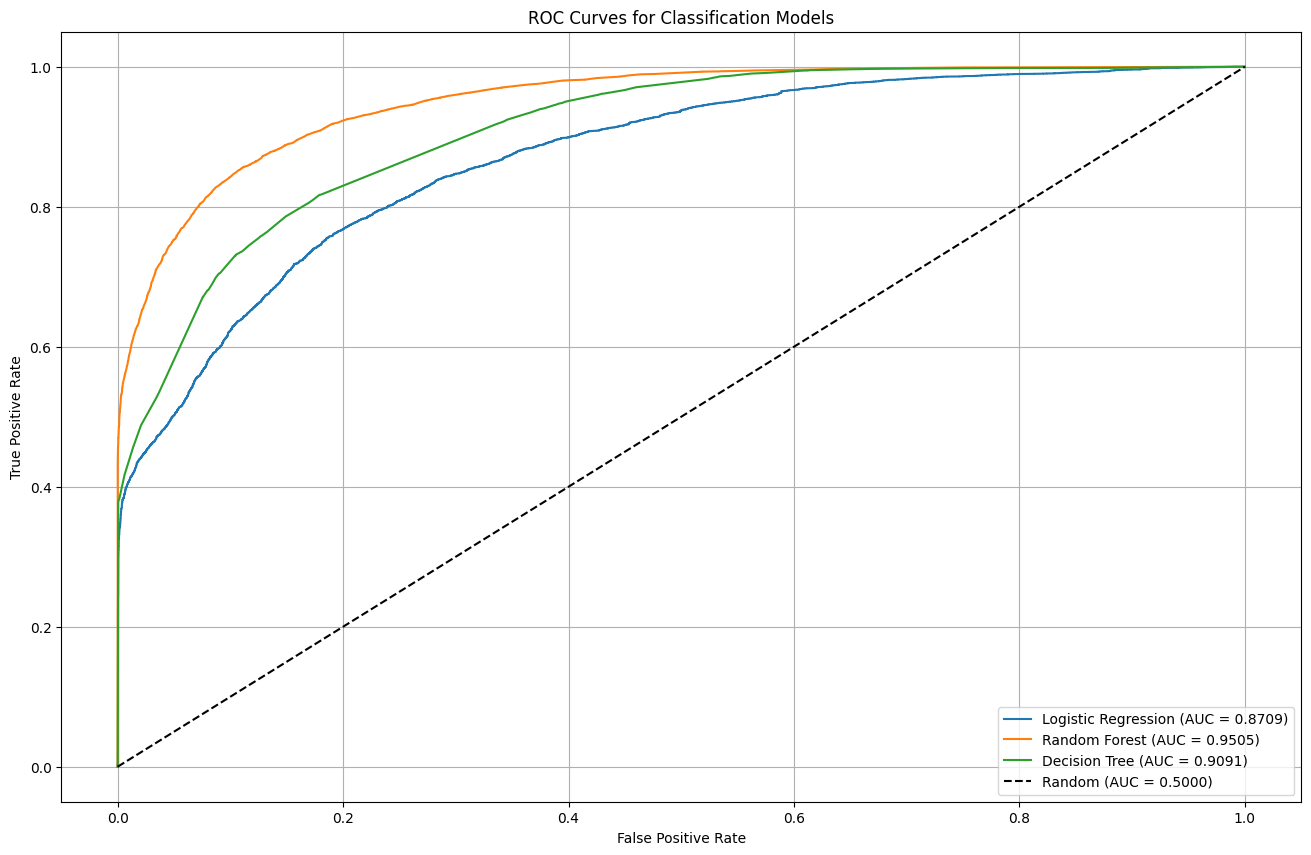

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))

for name, data in roc_data.items():
    plt.plot(data['fpr'], data['tpr'], label=f"{name} (AUC = {data['auc']:.4f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5000)') # Plot random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Classification Models')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
import pandas as pd

# Create a DataFrame from the evaluation results
evaluation_df = pd.DataFrame(evaluation_results).T

# Display the comparison table
display(evaluation_df)

Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.795376   0.798058  0.596710  0.682851
Random Forest        0.881020   0.867224  0.800227  0.832379
Decision Tree        0.834618   0.804049  0.729892  0.765178

Top 10 Most Important Features for Random Forest:


lead_time                    0.143069
adr_norm                     0.097223
occupancy_percentage         0.092099
deposit_type_Non Refund      0.084953
arrival_date_week_number     0.076329
deposit_type_No Deposit      0.075151
is_domestic                  0.070800
total_of_special_requests    0.053839
length_of_stay               0.047074
previous_cancellations       0.030424
dtype: float64

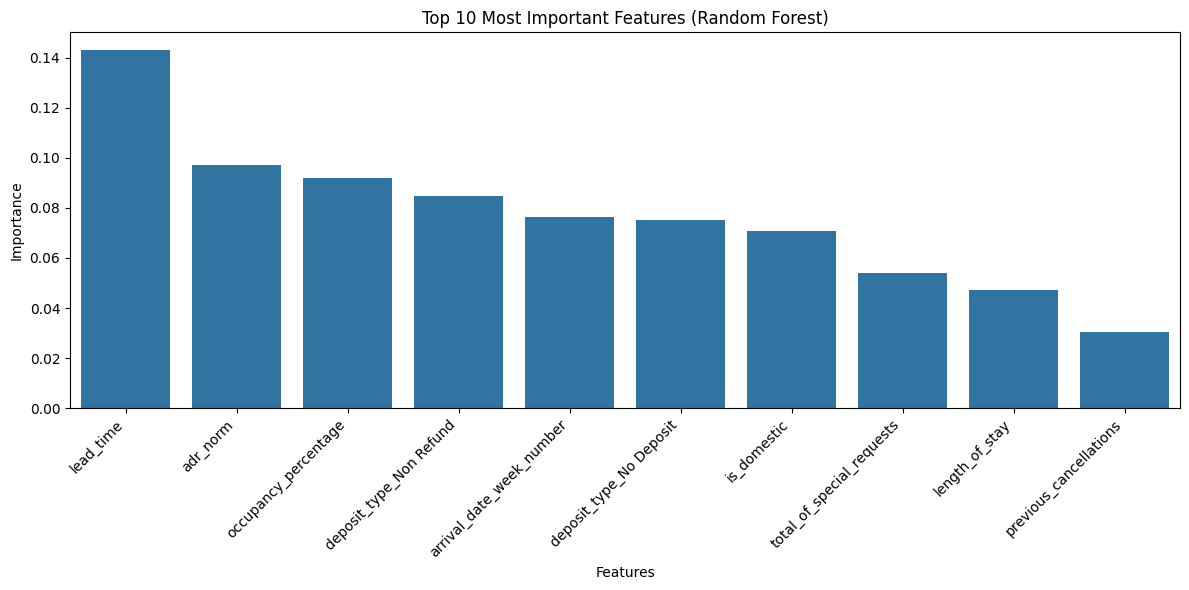

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the best Random Forest estimator
rf_model = best_estimators['Random Forest']

# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# Sort feature importances in descending order
sorted_feature_importances = feature_importances.sort_values(ascending=False)

# Display the top N most important features (e.g., top 10)
print("Top 10 Most Important Features for Random Forest:")
display(sorted_feature_importances.head(10))

# Optional: Visualize feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_feature_importances.head(10).index, y=sorted_feature_importances.head(10).values)
plt.title('Top 10 Most Important Features (Random Forest)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()